In [2]:
library("readxl")
library('dplyr')
library(ggplot2)

In [3]:
data <- read_excel("AF1_vs_EU1.xlsx")

In [4]:
tab <- function(passed_data){
    a_0 <- length(passed_data$match_status)
    a_1 <- sum(passed_data$match_status == 1)
    a_2 <- sum(passed_data$match_status == -1)
    a_3 <- sum(passed_data$match_status == 0)
    a_4 <- mean(passed_data$match_status == 1)
    a_5 <- mean(passed_data$match_status == -1)
    table <- matrix(round(c(a_0, a_0, a_1, a_2, a_3, a_3, a_2, a_1, a_4, a_5), 2), ncol = 2, byrow = TRUE)
    colnames(table) <- c(passed_data$region_A[1], passed_data$region_B[1])
    rownames(table) <- c('Played', 'Wins', 'Draws', 'Losses', 'Win Ratio')
    table
}

tab(data)


,AF1,EU1
Played,42.00,42.00
Wins,5.00,24.00
Draws,13.00,13.00
Losses,24.00,5.00
Win Ratio,0.12,0.57


In [5]:
data <- mutate(data, year_as_char = as.character(year))
head(data)

year,goal_margin,region_A,region_B,match_status,year_as_char
1978,2,AF1,EU1,-1,1978
1986,0,AF1,EU1,0,1986
1986,2,AF1,EU1,1,1986
1988,1,AF1,EU1,-1,1988
1989,1,AF1,EU1,-1,1989
1990,0,AF1,EU1,0,1990


In [6]:
data <- data %>% group_by(year_as_char) %>% summarize(ratio = round(mean(match_status), 2))
tail(data)
length(data$ratio)

#need to add the standard error 

year_as_char,ratio
2008,0.00
2009,1.00
2010,0.00
2013,0.00
2014,-1.00
2018,-0.83


[1] 21

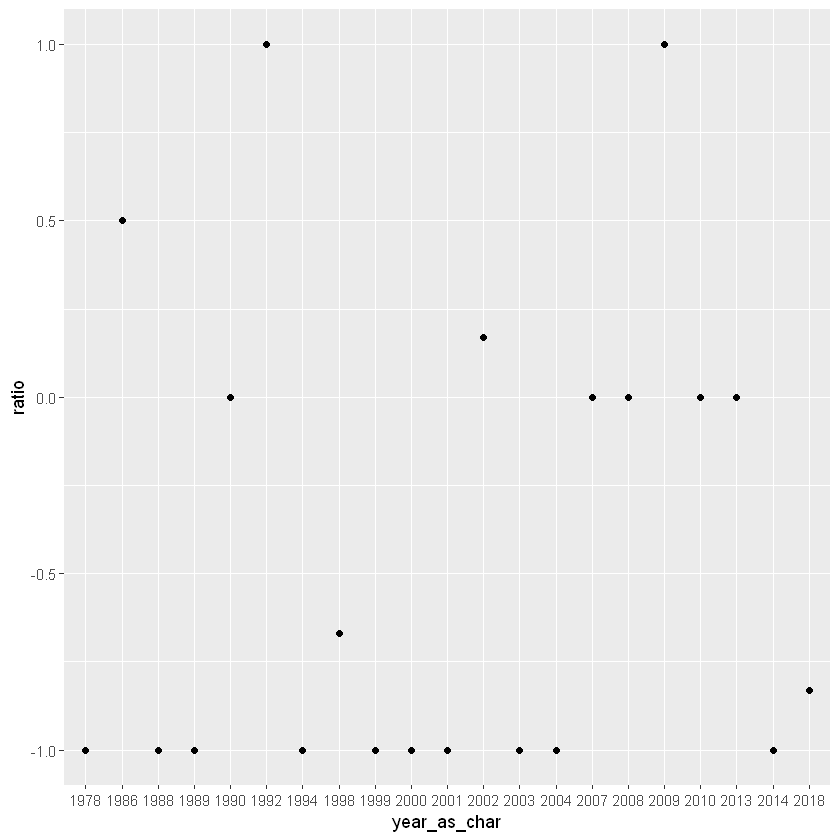

In [7]:
data %>% ggplot(aes(year_as_char, ratio)) + geom_point()